# Install the necessary libraries

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chenh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load the twentieth-century data

In [4]:
myfile = open('Key_Events_of_the_20th_Century_Wiki.txt', encoding='utf-8') 

In [5]:
# Import txt file

with open('Key_Events_of_the_20th_Century_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

# Tokenization

In [6]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise'

In [8]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4897 samples and 20427 outcomes>


In [9]:
dist_words.most_common(10)

[('.', 1274),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 398),
 ('to', 326),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

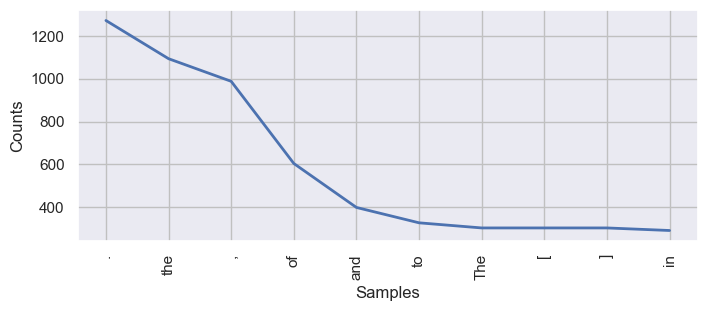

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Remove stop words (and punctuation marks if necessary)

In [11]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'his', "mightn't", 'hadn', 'didn', 'needn', 'ain', 'she', 'ours', 'll', 'they', "isn't", 'any', 'he', "it's", 'after', 'into', 'her', 'how', "you'll", 'my', 'if', 'mustn', 'above', 'haven', 'being', "wouldn't", 'whom', 'the', "doesn't", 'as', 'out', "needn't", 'were', 'and', 'it', 'on', 'them', 'will', 'shouldn', 'yours', "mustn't", 'ma', 'each', 'in', 's', 'won', 'of', 'wasn', 'an', 'both', 'a', 'yourselves', 'from', 'own', "aren't", "didn't", 'with', 'has', "that'll", "hadn't", 'was', 'more', 'now', 'once', 'does', 'this', 'until', 'o', "hasn't", 'between', 'am', 'me', 'most', 'mightn', 'such', 'is', 'too', 'but', 'hasn', 'during', 'don', 'do', 'when', 'through', "couldn't", "you'd", 'shan', 'i', "she's", 'aren', 'so', 'did', "don't", "shouldn't", 'same', 'few', 'what', "weren't", 'again', 'm', 'ourselves', 'its', 'to', 'him', 't', 'further', 'be', 'or', 'under', 'should', 'myself', 'been', 'yourself', 'against', 'themselves', 'doing', 'itself', "won't", 'below', 'isn', 'doesn', 'wh

In [12]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [13]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4794 samples and 15769 outcomes>


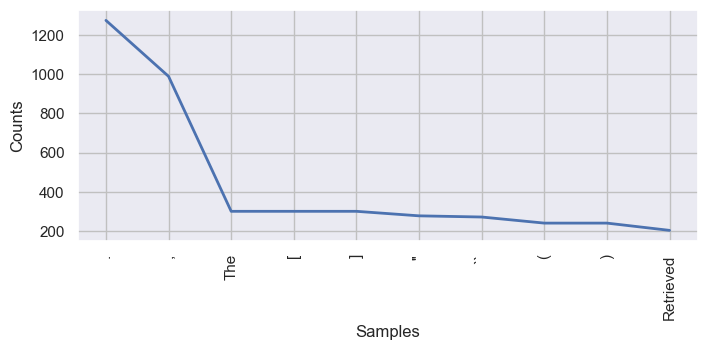

In [14]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

After filtering for stopword, it changed from 4897 samples to 4794samples, but there are still many punctuation marks that need to be removed

In [16]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",   " ",         
                    str(filtered_words))

In [17]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [19]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)
print(dist_words_filter_2)

<FreqDist with 4077 samples and 10715 outcomes>


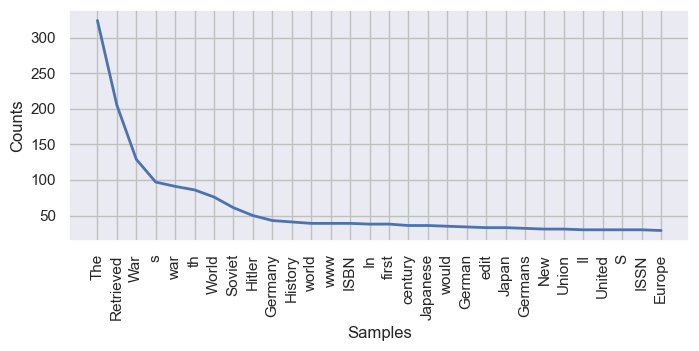

In [21]:
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

After filtering the punctuation marks, the result was much better, and it became 4077 samples, but there were still words such as 'The, s, th' that needed to be filtered out

In [22]:
dist_words_filter_2.most_common(30)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33),
 ('Germans', 32),
 ('New', 31),
 ('Union', 31),
 ('II', 30),
 ('United', 30),
 ('S', 30),
 ('ISSN', 30),
 ('Europe', 29)]

# Create a tags list

In [23]:
new_stopwords = ["The", "s", 'th', 'www', 'II', 'S']

In [24]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [25]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 5.95 ms


In [26]:
tags_list = text.tags

# Create a list of the Top 10 POS tags and Plot this list in a bar chart

In [27]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [28]:
df_t = df_text.groupby('Word type').count().reset_index()

In [29]:
top10 = df_t.nlargest(10, 'Words')

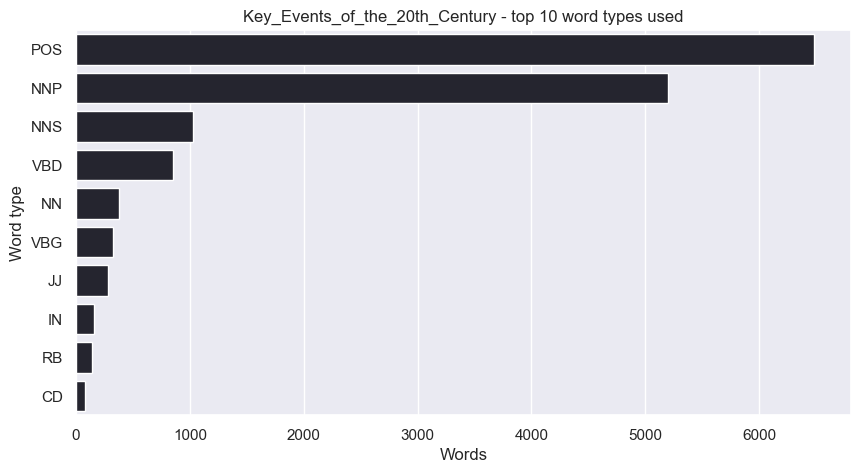

In [31]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key_Events_of_the_20th_Century - top 10 word types used")

# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives.

## Nouns

In [32]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_n = y.nlargest(15, 'Occurences')

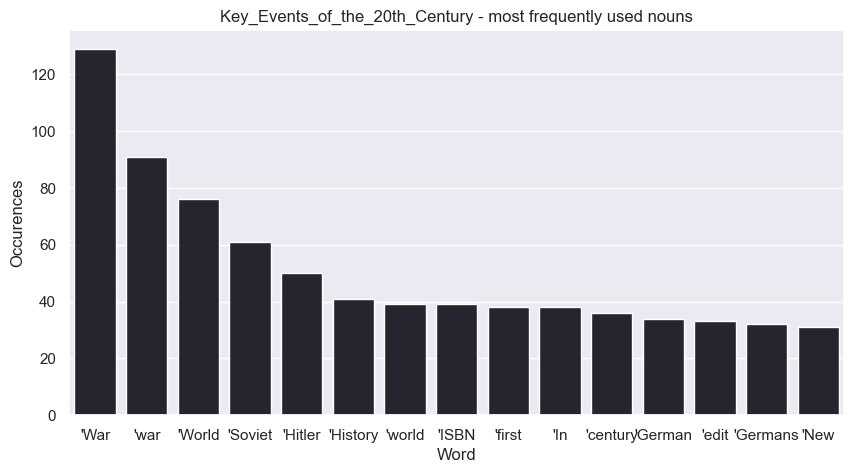

In [35]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_n).set_title("Key_Events_of_the_20th_Century - most frequently used nouns")

The most frequent term is War, and it seems that the key events of the 20th century were related to war

# Verbs

In [36]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_v = y.nlargest(15, 'Occurences')

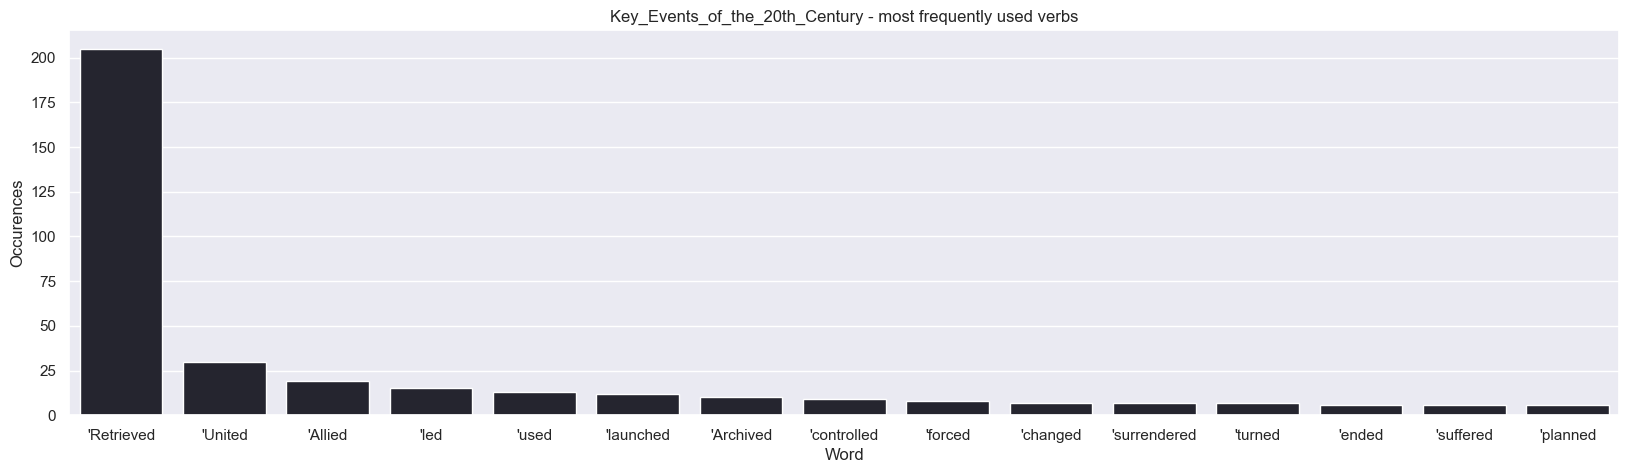

In [38]:
plt.figure(figsize=(20, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_v).set_title("Key_Events_of_the_20th_Century - most frequently used verbs")

The most frequent verb word is retrieved, and much higher than the others, and it seems that the recovery in the 20th century was important for every country

# Adjectives

In [39]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_a = y.nlargest(15, 'Occurences')

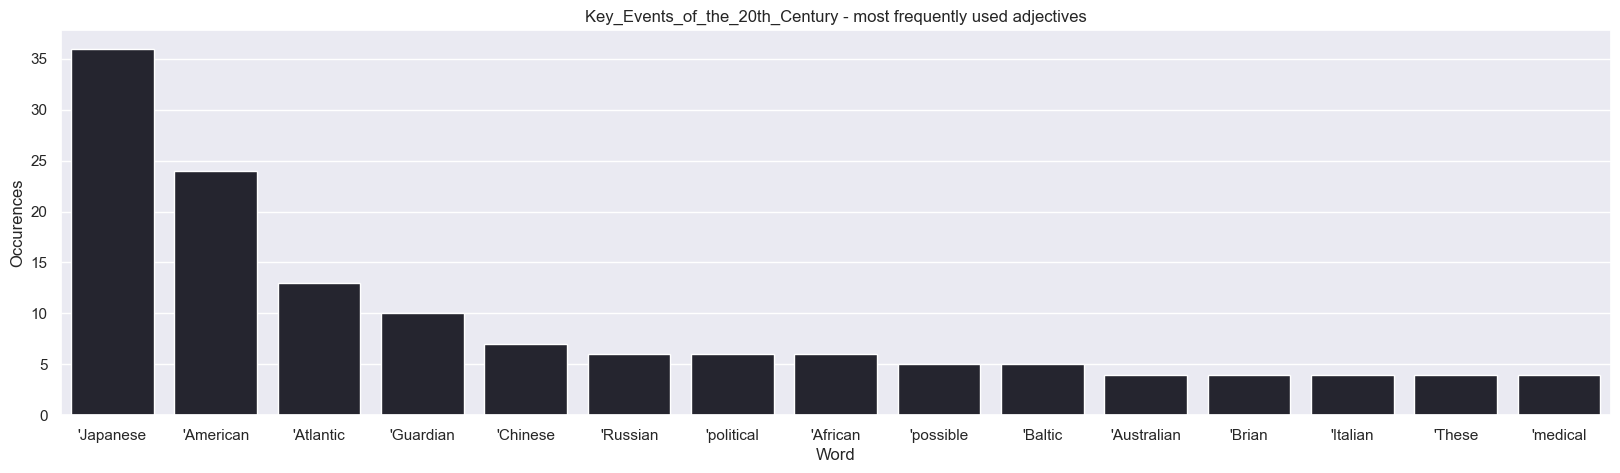

In [40]:
plt.figure(figsize=(20, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_a).set_title("Key_Events_of_the_20th_Century - most frequently used adjectives")

The most frequent adjective words are the adjective form of the country, and the most popular countries are Japan, United States and China

# Create a dataframe with the countries and the number of times they’re mentioned in your text

In [41]:
countries = pd.read_csv("Country_name.csv", index_col = 0)

In [42]:
countries

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
191,Venezuela
192,Vietnam
193,Yemen
194,Zambia


In [43]:
country_list = countries['Country'].to_list()

In [44]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events ce

In [45]:
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [47]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [48]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cabo Verde': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethi

In [57]:
country_list2=['Antigua','Bahamas','Korea','Congo','Dominican']

In [58]:
dict_of_counts2 = {d : all_counts[d] for d in country_list2}

In [59]:
dict_of_counts2

{'Antigua': 0, 'Bahamas': 0, 'Korea': 9, 'Congo': 1, 'Dominican': 0}

## Optimize

In [56]:
# Replace names with aliases

countries['Country'] = countries['Country'].replace('Congo, Democratic Republic of the','Congo')

In [60]:
countries['Country'] = countries['Country'].replace('Korea, North','Korea')

In [67]:
for country in countries['Country']:
    # Replace the spaces in the country names with "_" so they don't get split
    sanitized_country = country.replace(' ', '_')
    listToStr = re.sub(r'\b' + re.escape(country) + r'\b', sanitized_country, listToStr)
    countries['Country'] = countries['Country'].replace(country,sanitized_country)

In [69]:
country_list_R = countries['Country'].to_list()

In [70]:
country_list_R

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas,_The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cabo_Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo,_Republic_of_the',
 'Costa_Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech_Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'East_Timor',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hung

In [71]:
all_counts_R = Counter(listToStr.split())

In [73]:
dict_of_counts_R = {d : all_counts_R[d] for d in country_list_R}

In [74]:
dict_of_counts_R

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua_and_Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas,_The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia_and_Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina_Faso': 0,
 'Burundi': 0,
 'Cabo_Verde': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Central_African_Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Congo': 1,
 'Congo,_Republic_of_the': 0,
 'Costa_Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech_Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican_Republic': 0,
 'East_Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El_Salvador': 0,
 'Equatorial_Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiopia': 0,
 'Fiji': 0,
 'Finl

# Create a plot showing the frequency of the number of times these countries are mentioned in the text.

In [76]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts_R.items()}  
df = pd.DataFrame(dct)

In [78]:
df = df.transpose().reset_index()

In [79]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
191,Venezuela,0
192,Vietnam,13
193,Yemen,0
194,Zambia,0


In [80]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

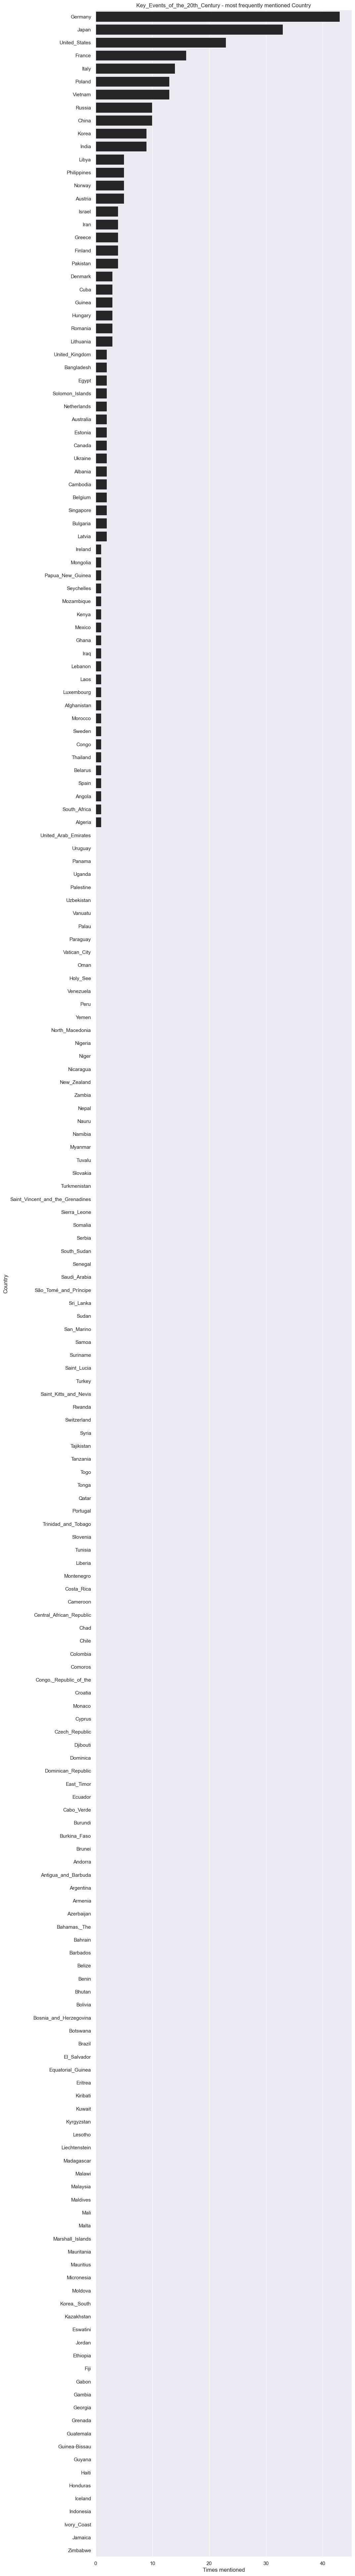

In [83]:
plt.figure(figsize=(10, 100))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Key_Events_of_the_20th_Century - most frequently mentioned Country")